In [30]:
import numpy as np
import os
import random
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython import display
#from qiskit.visualization import plot_bloch_vector

In [3]:
np.random.seed(6)


In [14]:
def Haar_sampling(N):
  l =[0] * N
  for i in range(N):
    M = np.random.normal( size = ( 2, 2 ) ) + 1j * np.random.normal( size = ( 2, 2 ) )
    X = M.dot(M.conj().T)
    l[i] = X/ np.trace(X)
  return l

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [63]:
def Sequential_MC(N_particuls, list_Mesure, list_instance):
  particuls = Haar_sampling(N_particuls)
  weights = [1/N_particuls] * N_particuls
  N_mesurement = len(list_instance)
  for i in range(N_mesurement):
    outcome = list_Mesure[list_instance[i]]
#    weight_total_nextstep = 0
 #   for part in range(N_particuls):
#      weight_total_nextstep += np.trace(particuls[part].dot(outcome)).real * weights[part]
    for part in range(N_particuls):
        weights[part] = np.trace(particuls[part].dot(outcome)).real * weights[part]
    weight_total_nextstep = np.sum(weights)
    for part in range(N_particuls):
        weights[part] = weights[part] / weight_total_nextstep
  return particuls,weights

In [77]:
particuls,weigths = Sequential_MC(5000, [np.matrix([[1 , 0],[0 , 0]]),np.matrix([[0 , 0],[0 , 1]])], np.random.binomial(1, 0.5, size=100))

In [65]:
np.random.binomial(1, 0.5, size=40)[1]

1

In [22]:
print(particuls)

[array([[ 0.24376834+0.j        , -0.09575173-0.41711204j],
       [-0.09575173+0.41711204j,  0.75623166+0.j        ]]), array([[ 0.49086928+0.j        , -0.15023335-0.24760104j],
       [-0.15023335+0.24760104j,  0.50913072+0.j        ]]), array([[0.80864098+0.j       , 0.02618731-0.2228756j],
       [0.02618731+0.2228756j, 0.19135902+0.j       ]]), array([[0.06809674+0.j        , 0.10258484-0.01890092j],
       [0.10258484+0.01890092j, 0.93190326+0.j        ]]), array([[ 0.64209079+0.j        , -0.15237173-0.40094185j],
       [-0.15237173+0.40094185j,  0.35790921+0.j        ]]), array([[ 0.8851105 +0.j        , -0.11218386-0.13080984j],
       [-0.11218386+0.13080984j,  0.1148895 +0.j        ]]), array([[ 0.35822225+0.j        , -0.13534284+0.18725265j],
       [-0.13534284-0.18725265j,  0.64177775+0.j        ]]), array([[0.28464243+0.j        , 0.42126683+0.02264409j],
       [0.42126683-0.02264409j, 0.71535757+0.j        ]]), array([[0.40250842+0.j        , 0.07317941+0.36226415j]

In [68]:
print(weigths)

[1.190551415091236e-05, 2.2958794529171374e-05, 6.239656824299342e-05, 0.00012912988257981112, 1.9239873837178637e-10, 4.93219701880406e-09, 5.979463907896983e-07, 0.0006920282173490265, 5.4396109338474515e-06, 0.0004181786299793863, 6.502812650070563e-07, 0.0006729900380183961, 0.0007177358132733824, 1.0445668651439651e-10, 0.0002587507976049885, 0.000686733197543014, 7.279255279285524e-05, 7.869844207727058e-16, 5.743901583019061e-06, 7.623224707909981e-09, 7.411589422435382e-12, 0.00025225645719710696, 7.694506855925227e-05, 2.1233851475011895e-05, 0.0004369884653581678, 8.665498844648261e-05, 7.046621662332224e-05, 0.0006476743946535634, 0.0007189187941411715, 0.0006286513891722845, 2.086537678734048e-07, 1.822336806779353e-05, 8.375849773249272e-05, 1.4240261565957813e-11, 3.0817122201568674e-09, 2.982455736322915e-10, 0.0005445448794320465, 7.892018622154659e-05, 0.000280107416524265, 0.0006017396799006514, 0.00035146705142729233, 2.2408161423222276e-17, 0.00020184352572214022, 0

In [78]:
max = np.amax(weigths)
print(max)
s = np.sum(weigths)
print(s)

0.0010968994872334566
1.0


In [38]:
Id = np.matrix([[1 , 0],[0 , 1]])
sx = np.matrix([[0 , 1] , [1 , 0]])
sy = np.matrix([[0 , -1j] , [1j , 0]])
sz = np.matrix([[1,0] , [0,-1]])

In [79]:
def measure(ρ):
    x = np.trace(np.dot(ρ, sx)).real
    y = np.trace(np.dot(ρ, sy)).real
    z = np.trace(np.dot(ρ, sz)).real
    return [x, y, z]

In [80]:
R = [measure(rho) for rho in particuls]

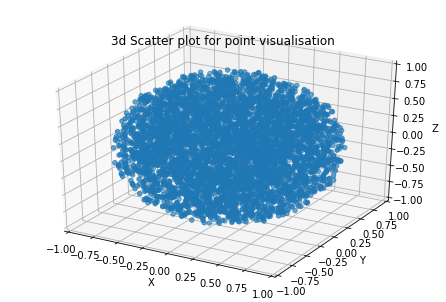

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
 
fig = plt.figure()
ax = p3.Axes3D(fig)
# Setting the axes properties
ax.set_xlim3d([-1.0, 1.0])
ax.set_xlabel('X')

ax.set_ylim3d([-1.0, 1.0])
ax.set_ylabel('Y')

ax.set_zlim3d([-1.0, 1.0])
ax.set_zlabel('Z')

ax.set_title('3D Test')
 
# syntax for 3-D projection
"""for i in range(len(list)):
  z = list[i][2]
  x = list[i][0]
  y = list[i][1]
  ax.scatter(x, y, z)"""
N = len(R)

z = [R[i][2] for i in range(N)]
x = [R[i][0] for i in range(N)]
y = [R[i][1] for i in range(N)]
ax.scatter(x, y, z)
 
# syntax for plotting
ax.set_title('3d Scatter plot for point visualisation')
plt.show()

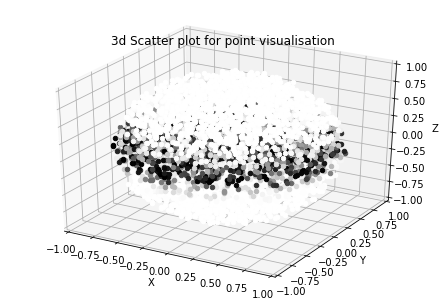

In [81]:
#plot with color for weight visualisation
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
 
fig = plt.figure()
ax = p3.Axes3D(fig)
# Setting the axes properties
ax.set_xlim3d([-1.0, 1.0])
ax.set_xlabel('X')

ax.set_ylim3d([-1.0, 1.0])
ax.set_ylabel('Y')

ax.set_zlim3d([-1.0, 1.0])
ax.set_zlabel('Z')

ax.set_title('3D Test')

N = len(R)
max = np.amax(weigths)
 
# syntax for 3-D projection
for i in range(N):
  c = ((1-weigths[i]/max),(1-weigths[i]/max), (1-weigths[i]/max))
  z = R[i][2]
  x = R[i][0]
  y = R[i][1]
  ax.scatter(x, y, z, color = c)


# syntax for plotting
ax.set_title('3d Scatter plot for point visualisation')
plt.show()

0.9912000032972971


In [50]:
s = np.sum(R)

In [51]:
print(s)

104.37661096185616
